## Import Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load the Dataset

In [2]:
import pandas as pd

train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])

# Summary statistics transposed
summary_stats = data.describe().transpose()



In [3]:
print(summary_stats)

                count          mean           std           min           25%  \
Unnamed: 0  1852394.0  5.371934e+05  3.669110e+05  0.000000e+00  2.315490e+05   
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  1.800429e+14   
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  9.640000e+00   
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  2.623700e+04   
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  3.466890e+01   
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -9.679800e+01   
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  7.410000e+02   
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.343017e+09   
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  3.474012e+01   
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -9.689944e+01   
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  0.000000e+00   

                     50%   

In [4]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [5]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [6]:
train.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutman

In [8]:
from sklearn.preprocessing import LabelEncoder

# Assume data, train, and test DataFrames are already defined

def label_encode_columns(data, train, test, columns):
    label_encoders = {}
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])
        label_encoders[col] = le
    return data, train, test, label_encoders

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
data, train, test, label_encoders = label_encode_columns(data, train, test, label_encode_cols)




In [9]:
def extract_datetime_features(df, datetime_cols):
    for col in datetime_cols:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour
        df.drop(col, axis=1, inplace=True)
    return df

datetime_cols = ['trans_date_trans_time', 'dob']
data = extract_datetime_features(data, datetime_cols)
train = extract_datetime_features(train, datetime_cols)
test = extract_datetime_features(test, datetime_cols)



In [10]:
cols_to_drop = ['first', 'last', 'street', 'city', 'trans_num']

data.drop(cols_to_drop, axis=1, inplace=True)
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)


In [11]:
print(train.shape)

(1296675, 24)


In [12]:
print(test.shape)


(555719, 24)


In [13]:
print(data.shape)

(1852394, 24)


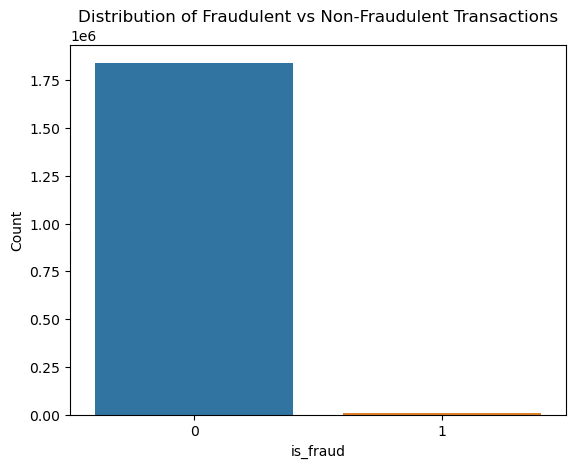

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()


In [15]:
print(data.index.duplicated().sum())


data = data.reset_index(drop=True)


print(data.index.duplicated().sum())


555719
0


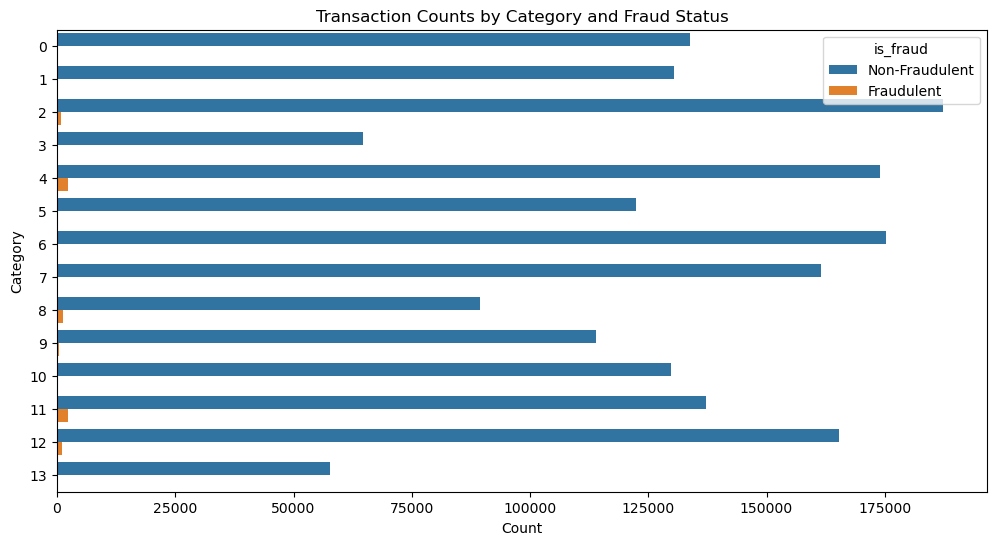

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks(rotation=0)
plt.legend(title='is_fraud', loc='best', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


## The 0 represent male and 1 represent female

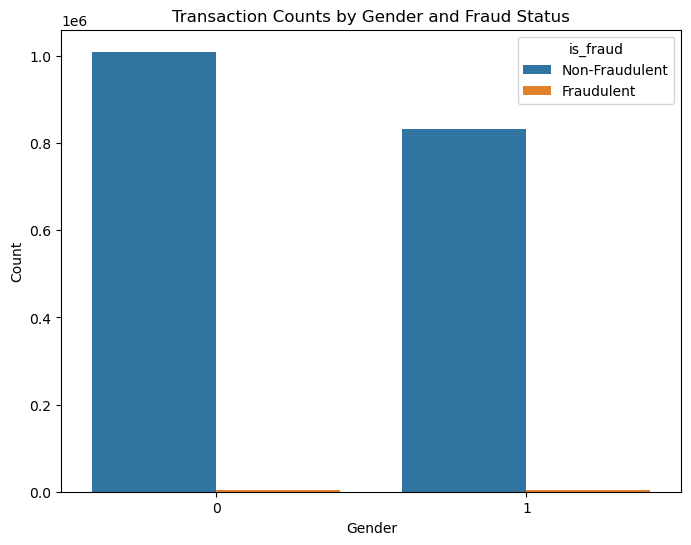

In [17]:
plt.figure(figsize=(8, 6))  

sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='is_fraud', loc='best', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


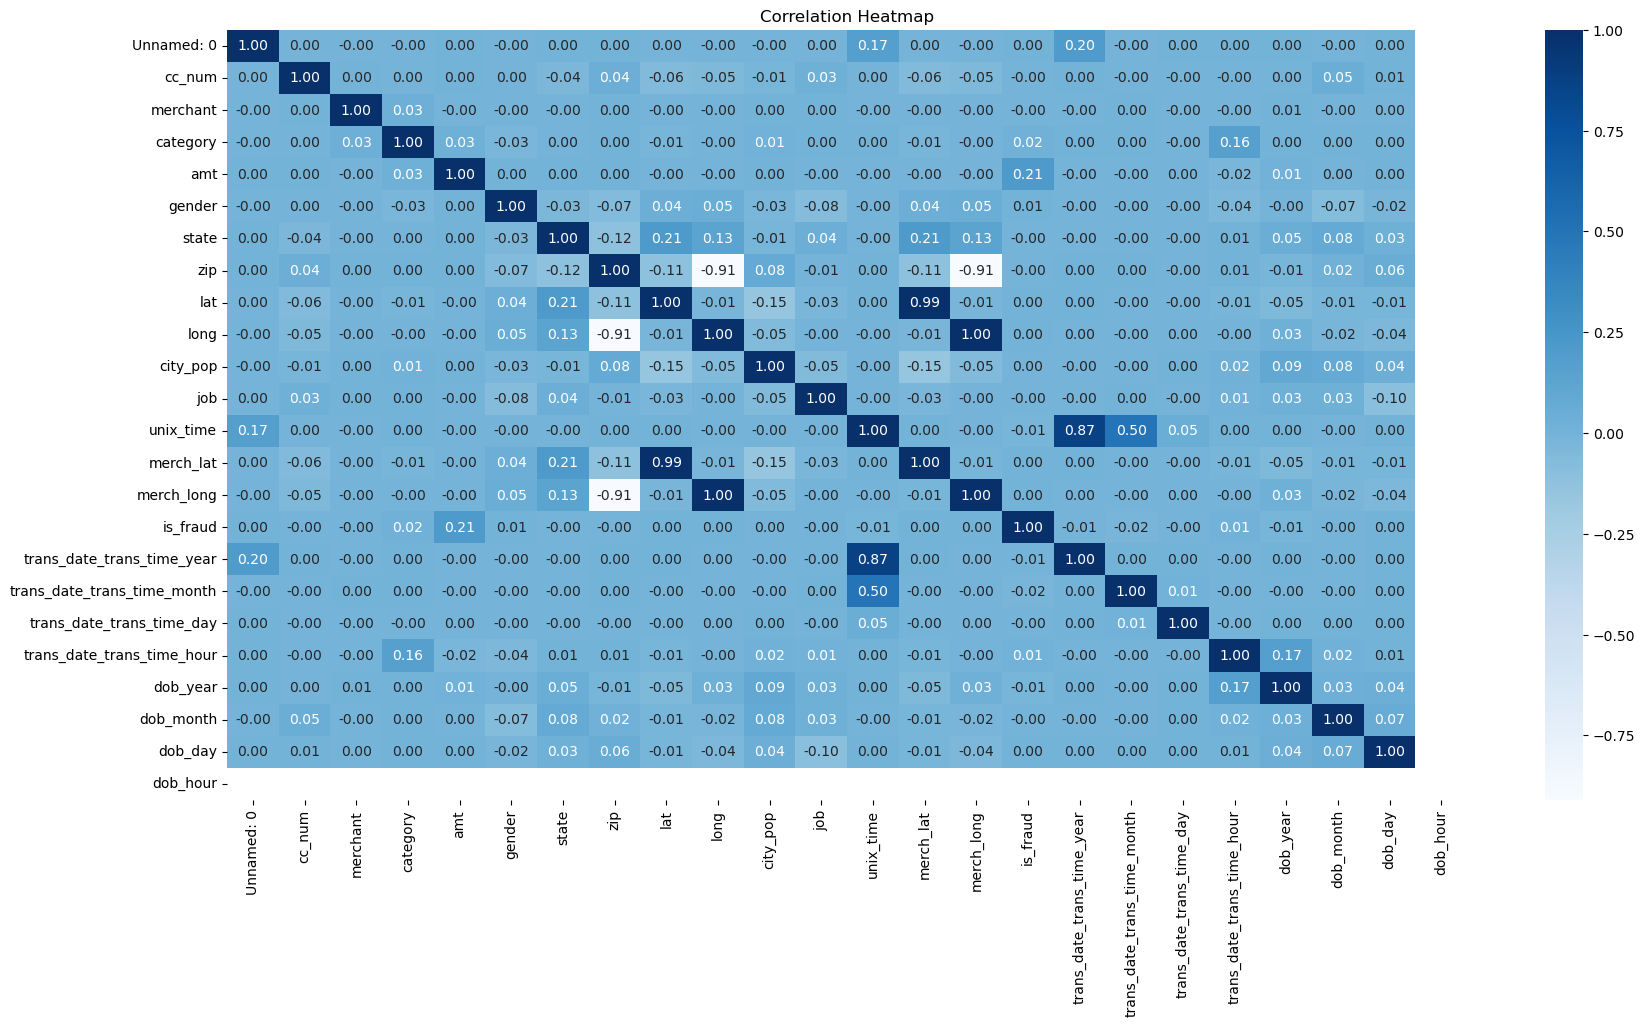

In [18]:
plt.figure(figsize=(20, 10))  

sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the data using logisticRegression model

In [20]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368526      0]
 [  1953      0]]
Accuracy: 0.9947284461467452


## Training the data using Decision Tree Classifier model

In [21]:
# Initialize and train the Decision Tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368105    421]
 [   311   1642]]
Accuracy: 0.9980241795081503
